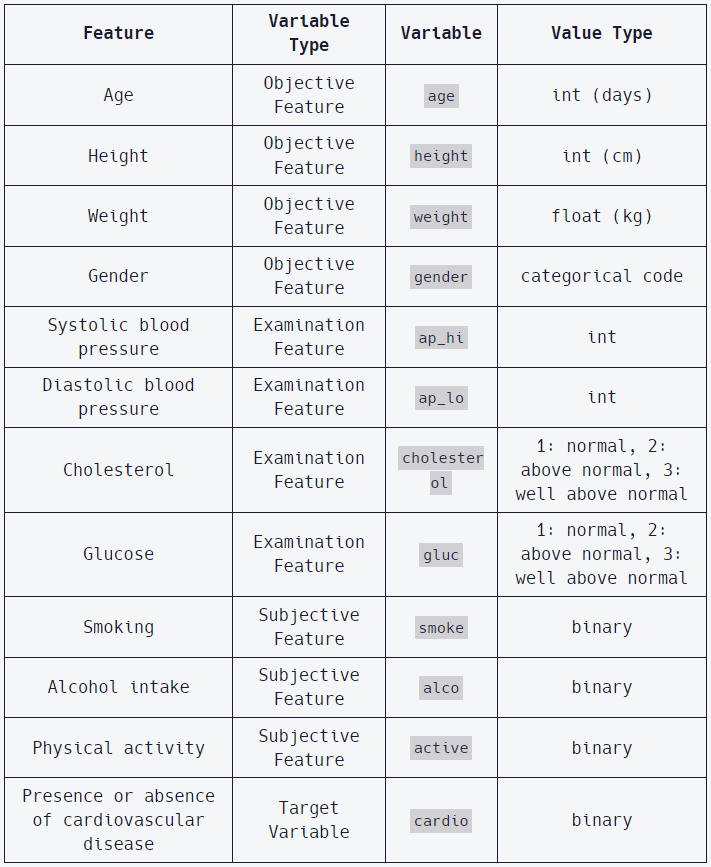

1.Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. 

2.Use the value 0 for NOT overweight and the value 1 for overweight.
Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

3.Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

4.Clean the data. Filter out the following patient segments that represent incorrect data:
  
  diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
  
  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
  
  height is more than the 97.5th percentile
  
  weight is less than the 2.5th percentile
  
  weight is more than the 97.5th percentile

5.Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

Figure_1.png
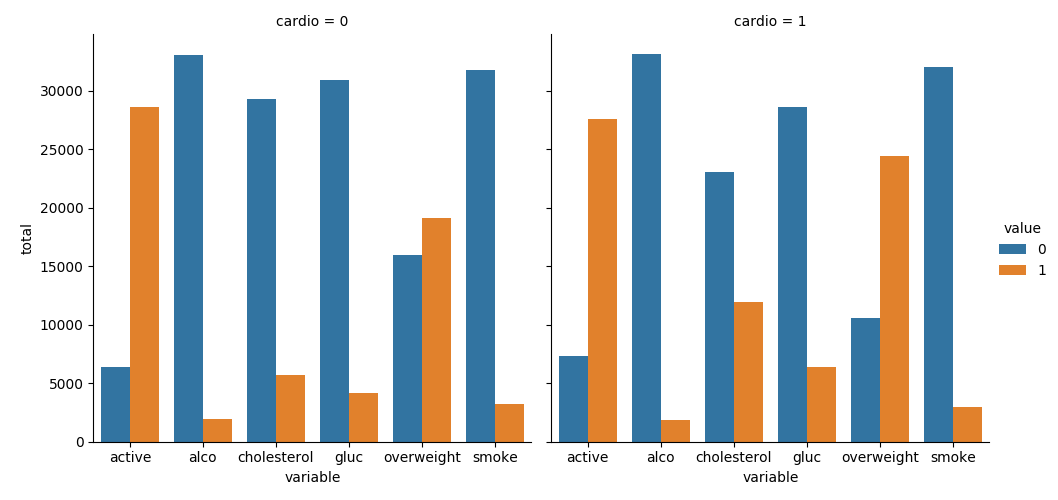

Figure_2.png
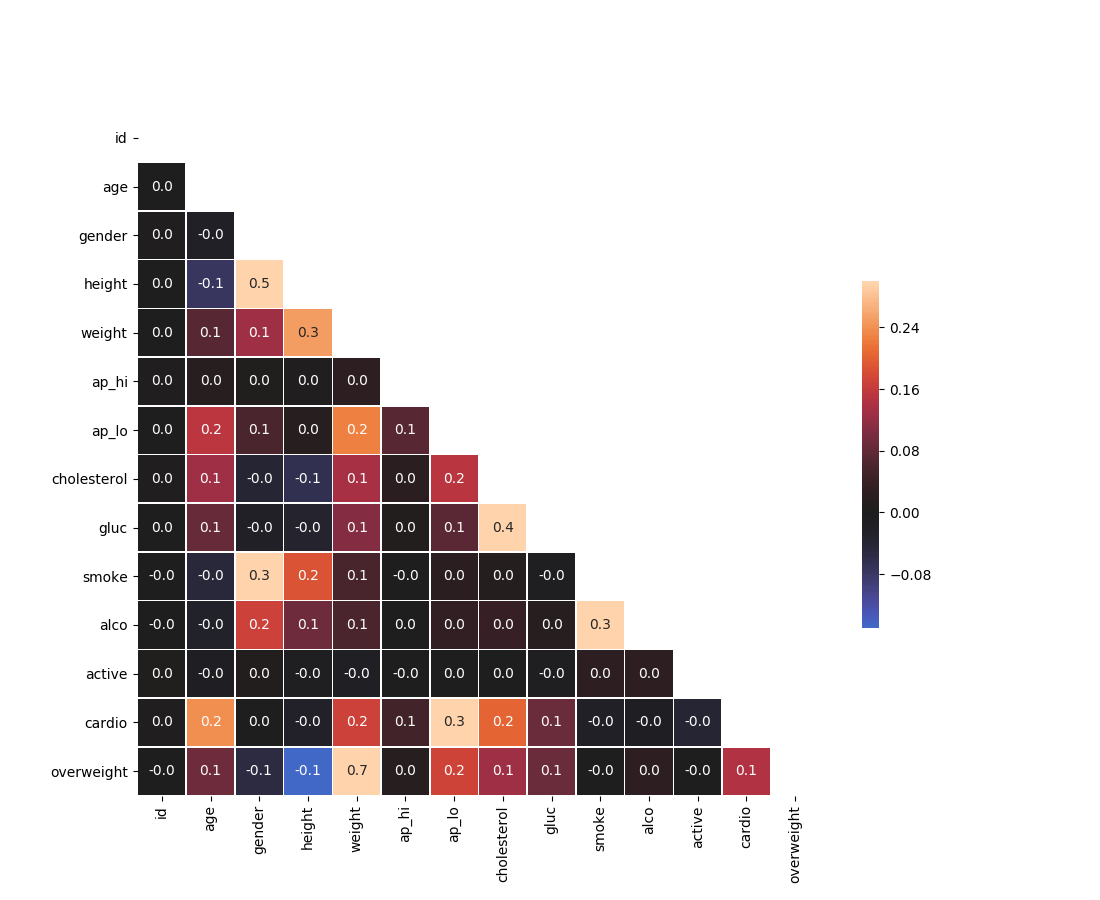

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files, drive
uploaded = files.upload()

Saving medical_examination.csv to medical_examination.csv


In [ ]:
data = io.BytesIO(uploaded['medical_examination.csv'])

In [ ]:
df = pd.read_csv(
    data,
)

In [ ]:
df['overweight'] = np.where((df['weight'] / ((df['height'] / 100) ** 2)) > 25, 1, 0)

df['cholesterol'] = np.where((df['cholesterol'] == 1), 0, 1)

df['gluc'] = np.where((df['gluc'] == 1), 0, 1)

In [ ]:
df = df[(df['ap_lo'] <= df['ap_hi'])]
df = df[(df['height'] >= df['height'].quantile(0.025))]
df = df[(df['height'] <= df['height'].quantile(0.975))]
df = df[(df['weight'] >= df['weight'].quantile(0.025))]
df = df[(df['weight'] <= df['weight'].quantile(0.975))]
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


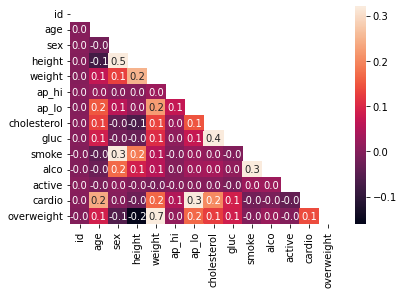

In [ ]:
matrix = np.triu(df.corr())
s = sns.heatmap(df.corr(), vmin=-0.16, vmax=0.32, cmap= 'rocket',annot = True,fmt=".1f", mask=matrix)
plt.show()

In [ ]:
df2 = pd.melt(df, id_vars =['id', 'cardio'], value_vars =['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df2

,id,cardio,variable,value
0,0,0,active,1
1,1,1,active,1
2,2,1,active,0
3,3,1,active,1
4,4,0,active,0
...,...,...,...,...
376699,99991,1,smoke,0
376700,99992,1,smoke,0
376701,99993,0,smoke,1
376702,99998,1,smoke,0


In [ ]:
car0_df = df2.groupby(['cardio', 'variable', 'value'])['id'].nunique().reset_index()
car0_df

,cardio,variable,value,id
0,0,active,0,5786
1,0,active,1,26013
2,0,alco,0,30051
3,0,alco,1,1748
4,0,cholesterol,0,26737
5,0,cholesterol,1,5062
6,0,gluc,0,28109
7,0,gluc,1,3690
8,0,overweight,0,14157
9,0,overweight,1,17642


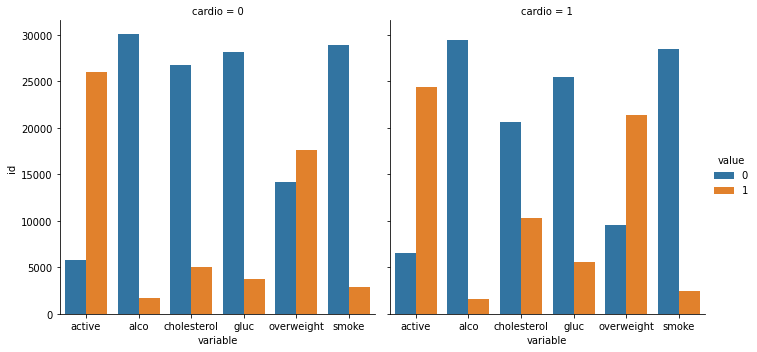

In [ ]:
sns.catplot(
    data=car0_df, x="variable", y="id", col="cardio", hue='value',  kind="bar"
    )